<a href="https://colab.research.google.com/github/veronica1908/SALUD_E3_AIII/blob/main/b_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aplicaciones en operaciones (Salud)

CÉSAR IVÁN ÁVILA DÍAZ

VERÓNICA ANDREA MORALES GONZÁLEZ

Analítica 3

2024-1

REPOSITORIO: https://github.com/veronica1908/SALUD_E3_AIII

#Librerías

In [1]:
# Instalamos librerías que podriamos necesitar
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
##Librerías

import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import a_funciones as funciones

import joblib  ### para guardar modelos
import openpyxl

#Bases de datos

In [3]:
#Importamos la base de datos
df_final2 = pd.read_csv('https://raw.githubusercontent.com/veronica1908/SALUD_E3_AIII/main/df_final.csv', sep=',')
df_final2

,NRODOC,SEXO,EDAD,YEAR_x,MES_x,ÚLTIMA CLASE FUNCIONAL,QUINQUENIO,YEAR_y,MES_y,VIA INGRESO,...,PROFESIONAL ESPECIALIDAD,TIEMPO ESTANCIA (DIAS),YEAR,MES,PESO,TALLA,CLASIFICACION IMC,DIAGNOSTICO PRINCIPAL,AMBITO SEGUN EL MEDICO,CATEGORIAS DIAGNOSTICOS
0,307994,M,89,2017,SEPTIEMBRE,SIN CLASIFICAR,85-89,2021,OCTUBRE,Urgencias,...,Urgentologia,0,2017,DICIEMBRE,63.0,162.0,Normal,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Ambulatorio,Cardiología
1,306526,M,79,2017,SEPTIEMBRE,SIN CLASIFICAR,75-79,2018,ENERO,Urgencias,...,Medicina Interna,1,2017,OCTUBRE,67.0,153.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Domiciliario,Cardiología
2,307053,M,79,2017,SEPTIEMBRE,SIN CLASIFICAR,75-79,2021,OCTUBRE,Urgencias,...,Medicina Interna,3,2017,DICIEMBRE,74.0,158.0,Sobrepeso,E109 - DIABETES MELLITUS INSULINODEPENDIENTE S...,Ambulatorio,Endocrinología
3,306688,M,71,2017,SEPTIEMBRE,SIN CLASIFICAR,70-74,2018,ENERO,Urgencias,...,Ortopedia,12,2017,NOVIEMBRE,73.0,169.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Ambulatorio,Cardiología
4,306688,M,71,2017,SEPTIEMBRE,SIN CLASIFICAR,70-74,2018,ENERO,Urgencias,...,Ortopedia,12,2021,FEBRERO,71.0,169.0,Normal,E108 - DIABETES MELLITUS INSULINODEPENDIENTE C...,Sin dato,Endocrinología
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,313987,F,68,2021,OCTUBRE,CLASE FUNCIONAL 2A,65-69,2021,NOVIEMBRE,Urgencias,...,Medicina Interna,2,2021,OCTUBRE,51.5,145.0,Normal,M329 - LUPUS ERITEMATOSO SISTEMICO SIN OTRA ES...,Sin dato,Otras
1243,308394,M,60,2021,NOVIEMBRE,CLASE FUNCIONAL 4,60-64,2021,AGOSTO,Urgencias,...,Urologia,0,2021,FEBRERO,62.0,162.0,Normal,G820 - PARAPLEJIA FLACIDA,Sin dato,Otras
1244,306827,M,60,2022,FEBRERO,CLASE FUNCIONAL 4,60-64,2021,ABRIL,Urgencias,...,Medicina Interna,4,2018,SEPTIEMBRE,80.0,174.0,Sobrepeso,SIN INFORMACION,Sin dato,Otras
1245,306827,M,60,2022,FEBRERO,CLASE FUNCIONAL 4,60-64,2021,ABRIL,Urgencias,...,Medicina Interna,4,2021,FEBRERO,80.0,176.0,Sobrepeso,T913 - SECUELAS DE TRAUMATISMO DE LA MEDULA ES...,Sin dato,Otras


In [4]:
#Observar si existen nulos
df_final2.isnull().sum()

NRODOC                          0
SEXO                            0
EDAD                            0
YEAR_x                          0
MES_x                           0
ÚLTIMA CLASE FUNCIONAL          0
QUINQUENIO                      0
YEAR_y                          0
MES_y                           0
VIA INGRESO                     0
SERVICIO EGRESO                 0
TIPO EGRESO                     0
FECHA INGRESO CLINICA           0
FECHA INGRESO SERVICIO          0
FECHA SALIDA                    0
DEMORA ASIGNACION CAMA          0
DEMORA SALIDA CLINICA (DIAS)    0
TRANSFUSION SANGRE              0
ANTIBIOTICO                     0
PROFESIONAL ESPECIALIDAD        0
TIEMPO ESTANCIA (DIAS)          0
YEAR                            0
MES                             0
PESO                            0
TALLA                           0
CLASIFICACION IMC               0
DIAGNOSTICO PRINCIPAL           0
AMBITO SEGUN EL MEDICO          0
CATEGORIAS DIAGNOSTICOS         0
dtype: int64

In [5]:
# Borramos las variables que no necesitamos y no aportan al modelo

columnas_a_borrar = ['NRODOC', 'YEAR_x', 'MES_x', 'YEAR_y', 'MES_y', 'YEAR', 'MES','QUINQUENIO','VIA INGRESO','SERVICIO EGRESO','AMBITO SEGUN EL MEDICO','FECHA INGRESO CLINICA','FECHA INGRESO SERVICIO','FECHA SALIDA']

df_final2 = df_final2.drop(columns=columnas_a_borrar)
df_final2.head()

,SEXO,EDAD,ÚLTIMA CLASE FUNCIONAL,TIPO EGRESO,DEMORA ASIGNACION CAMA,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,PROFESIONAL ESPECIALIDAD,TIEMPO ESTANCIA (DIAS),PESO,TALLA,CLASIFICACION IMC,DIAGNOSTICO PRINCIPAL,CATEGORIAS DIAGNOSTICOS
0,M,89,SIN CLASIFICAR,Fallece,0.000000,0,NO,SI,Urgentologia,0,63.0,162.0,Normal,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Cardiología
1,M,79,SIN CLASIFICAR,Remisión a otra institución,0.000000,0,NO,NO,Medicina Interna,1,67.0,153.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Cardiología
2,M,79,SIN CLASIFICAR,Alta Médica,1.884028,0,NO,NO,Medicina Interna,3,74.0,158.0,Sobrepeso,E109 - DIABETES MELLITUS INSULINODEPENDIENTE S...,Endocrinología
3,M,71,SIN CLASIFICAR,Alta Médica,3.950000,0,NO,NO,Ortopedia,12,73.0,169.0,Sobrepeso,I10X - HIPERTENSION ESENCIAL (PRIMARIA),Cardiología
4,M,71,SIN CLASIFICAR,Alta Médica,3.950000,0,NO,NO,Ortopedia,12,71.0,169.0,Normal,E108 - DIABETES MELLITUS INSULINODEPENDIENTE C...,Endocrinología


Convertir a dummies

In [6]:
df_dummies = df_final2.copy()

In [7]:
# Identificamos las columnas categoricas
cat_df_final = df_dummies.select_dtypes(include=['object']).columns

# Crear un listado para almacenar el detalle de las categorías únicas de cada columna
detalle_categorias = []

# Iterar a través de las columnas categóricas y almacenar el detalle de las categorías únicas en el listado
for column in cat_df_final:
    unique_categories = df_dummies[column].unique()
    detalle_categorias.append((column, unique_categories))

# Mostrar el detalle de las categorías únicas
for column, categories in detalle_categorias:
    print(f'Categorías en "{column}":')
    for category in categories:
        print(f'    {category}')


Categorías en "SEXO":
    M
    F
Categorías en "ÚLTIMA CLASE FUNCIONAL":
    SIN CLASIFICAR
    CLASE FUNCIONAL 3
    CLASE FUNCIONAL 2A
    CLASE FUNCIONAL 2B
    CLASE FUNCIONAL 4
    CLASE FUNCIONAL 1
Categorías en "TIPO EGRESO":
    Fallece
    Remisión a otra institución
    Alta Médica
    Alta Voluntaria
Categorías en "TRANSFUSION SANGRE":
    NO
    SI
Categorías en "ANTIBIOTICO":
    SI
    NO
Categorías en "PROFESIONAL ESPECIALIDAD":
    Urgentologia
    Medicina Interna
    Ortopedia
    Medicina General
    Cirugia General Grupo 2
    Cirugia General Grupo 1 
    Cirugia General Grupo 3
    Geriatria
    Cirugia Hepatobiliopancreatica
    Neurocirugia
    Cirugia Vascular
    Urologia
    Neurologia
    Cx trasplantes/hepatobiliopancreatrica
    Cirugia General
    Nefrologia
    Psiquiatria
    Cardiologia
    Cirugia Plastica- Maxilofacial y de la Mano
    Otorrinolaringologia
    UCI
    Hepatología
    Oftalmologia
    Cirugia de Cabeza y Cuello
    Toxicologia
    Neu

In [8]:
list_dummies = cat_df_final.difference(['SEXO','DIAGNOSTICO PRINCIPAL'])
list_dummies

Index(['ANTIBIOTICO', 'CATEGORIAS DIAGNOSTICOS', 'CLASIFICACION IMC',
       'PROFESIONAL ESPECIALIDAD', 'TIPO EGRESO', 'TRANSFUSION SANGRE',
       'ÚLTIMA CLASE FUNCIONAL'],
      dtype='object')

In [9]:
# Creamos un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_df_final:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_final = pd.get_dummies(df_dummies)

In [10]:
df_dummies_final.head(10)

,SEXO,EDAD,DEMORA ASIGNACION CAMA,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,TIEMPO ESTANCIA (DIAS),PESO,TALLA,ÚLTIMA CLASE FUNCIONAL_CLASE FUNCIONAL 1,...,CATEGORIAS DIAGNOSTICOS_Endocrinología,CATEGORIAS DIAGNOSTICOS_Gastroenterología,CATEGORIAS DIAGNOSTICOS_Infectología,CATEGORIAS DIAGNOSTICOS_Nefrología,CATEGORIAS DIAGNOSTICOS_Neurología,CATEGORIAS DIAGNOSTICOS_Oncología,CATEGORIAS DIAGNOSTICOS_Otras,CATEGORIAS DIAGNOSTICOS_Psiquiatría,CATEGORIAS DIAGNOSTICOS_Pulmonología,CATEGORIAS DIAGNOSTICOS_Reumatología
0,1,89,0.000000,0,0,1,0,63.0,162.0,False,...,False,False,False,False,False,False,False,False,False,False
1,1,79,0.000000,0,0,0,1,67.0,153.0,False,...,False,False,False,False,False,False,False,False,False,False
2,1,79,1.884028,0,0,0,3,74.0,158.0,False,...,True,False,False,False,False,False,False,False,False,False
3,1,71,3.950000,0,0,0,12,73.0,169.0,False,...,False,False,False,False,False,False,False,False,False,False
4,1,71,3.950000,0,0,0,12,71.0,169.0,False,...,True,False,False,False,False,False,False,False,False,False
5,1,64,0.000000,0,0,0,6,95.0,161.0,False,...,False,False,False,False,False,False,True,False,False,False
6,1,64,0.000000,0,0,0,6,87.0,154.0,False,...,True,False,False,False,False,False,False,False,False,False
7,1,64,0.000000,0,0,0,6,92.0,157.0,False,...,True,False,False,False,False,False,False,False,False,False
8,1,67,0.299306,0,0,0,3,96.0,163.0,False,...,False,False,False,False,False,False,False,False,False,False
9,1,67,0.299306,0,0,0,3,90.0,163.0,False,...,True,False,False,False,False,False,False,False,False,False


#Escalado y/o estandarización de los datos

In [11]:
######## con base en los modelos candidatos se realizará una selección de variables ########
y = df_dummies_final['TIEMPO ESTANCIA (DIAS)']
X1 = df_dummies_final.loc[:, ~df_dummies_final.columns.isin(['TIEMPO ESTANCIA (DIAS)'])]
scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

#Árbol de decisión

|--- PROFESIONAL ESPECIALIDAD_Cirugia Plastica- Maxilofacial y de la Mano <= 7.85
|   |--- ANTIBIOTICO <= 0.11
|   |   |--- DEMORA ASIGNACION CAMA <= -0.48
|   |   |   |--- value: [2.30]
|   |   |--- DEMORA ASIGNACION CAMA >  -0.48
|   |   |   |--- value: [3.97]
|   |--- ANTIBIOTICO >  0.11
|   |   |--- PROFESIONAL ESPECIALIDAD_Ortopedia <= 1.87
|   |   |   |--- value: [4.95]
|   |   |--- PROFESIONAL ESPECIALIDAD_Ortopedia >  1.87
|   |   |   |--- value: [10.81]
|--- PROFESIONAL ESPECIALIDAD_Cirugia Plastica- Maxilofacial y de la Mano >  7.85
|   |--- CLASIFICACION IMC_Normal <= 0.44
|   |   |--- CLASIFICACION IMC_Bajo <= 2.73
|   |   |   |--- value: [36.33]
|   |   |--- CLASIFICACION IMC_Bajo >  2.73
|   |   |   |--- value: [59.00]
|   |--- CLASIFICACION IMC_Normal >  0.44
|   |   |--- value: [3.00]



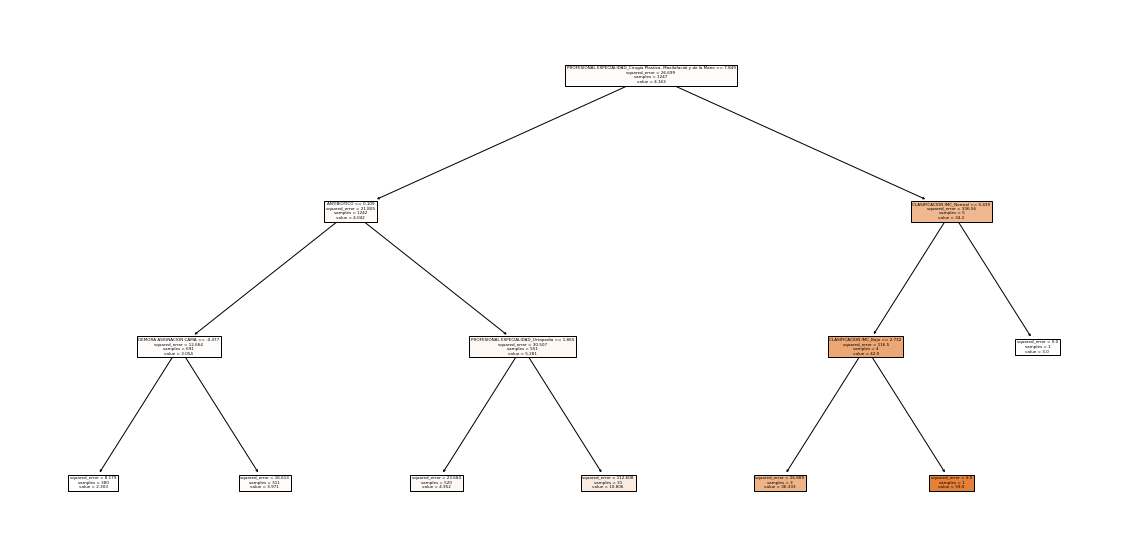

In [12]:
# Crear y entrenar el modelo de árbol de decisión para regresión
rtree = DecisionTreeRegressor(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

#Modelos candidatos

In [13]:
# Define los modelos de regresión seleccionados
#m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [ m_tree_reg, m_rf_reg, m_gbt_reg]


Selección de variables

In [14]:
# Ahora, utiliza estos modelos para seleccionar las variables
var_names = funciones.sel_variables(modelos_reg, X, y, threshold="2*mean")
X2=X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 23 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   ANTIBIOTICO                                                                                      1247 non-null   float64
 1   CLASIFICACION IMC_Obesidad Grasa                                                                 1247 non-null   float64
 2   DEMORA ASIGNACION CAMA                                                                           1247 non-null   float64
 3   DEMORA SALIDA CLINICA (DIAS)                                                                     1247 non-null   float64
 4   DIAGNOSTICO PRINCIPAL_E107 - DIABETES MELLITUS INSULINODEPENDIENTE CON COMPLICACIONES MULTIPLES  1247 non-null   float64
 5   DIAGNO

Definir modelo ganador

In [21]:

def medir_modelos(modelos, X, y, cv):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='neg_mean_squared_error')
        mse_scores = -scores  # Convertir puntuaciones negativas a positivas
        resultados[nombre_modelo] = mse_scores.mean()
    return resultados

# Calcular MSE para todos los modelos con todas las variables
mse_scores_all = medir_modelos(modelos_reg, X, y, 30)

# Calcular MSE para todos los modelos con variables seleccionadas
mse_scores_varsel = medir_modelos(modelos_reg, X2, y, 30)

print("MSE para todos los modelos con todas las variables:")
for modelo, mse_score in mse_scores_all.items():
    print(f"{modelo}: {mse_score}")

print("\nMSE para todos los modelos con variables seleccionadas:")
for modelo, mse_score in mse_scores_varsel.items():
    print(f"{modelo}: {mse_score}")


MSE para todos los modelos con todas las variables:
DecisionTreeRegressor: 40.000561362756486
RandomForestRegressor: 23.552307882307396
GradientBoostingRegressor: 22.88761760329567

MSE para todos los modelos con variables seleccionadas:
DecisionTreeRegressor: 42.428339140534256
RandomForestRegressor: 24.481627175764615
GradientBoostingRegressor: 23.72096894268834


Resultados:  

DecisionTreeRegressor:

Con todas las variables: MSE = 39.25
Con variables seleccionadas: MSE = 41.23
Interpretación: El modelo de árbol de decisión parece funcionar mejor cuando se utilizan todas las variables en lugar de un conjunto seleccionado. Sin embargo, la diferencia en MSE no es muy significativa.

RandomForestRegressor:

Con todas las variables: MSE = 23.51
Con variables seleccionadas: MSE = 24.41
Interpretación: El modelo de bosque aleatorio también muestra un rendimiento ligeramente mejor cuando se utilizan todas las variables, pero nuevamente, la diferencia no es muy grande.

GradientBoostingRegressor:

Con todas las variables: MSE = 22.76
Con variables seleccionadas: MSE = 23.84
Interpretación: Similar al RandomForest, el Gradient Boosting Regressor parece tener un rendimiento ligeramente mejor cuando se utilizan todas las variables, sin embargo la diferencia no es muy significativa.

Por lo tanto el modelo GradientBoostingRegressor tiene el MSE más bajo tanto para el conjunto de datos con todas las variables como para el conjunto de datos con variables seleccionadas. Por lo tanto, si solo consideramos el MSE como métrica de evaluación, podríamos concluir que el modelo GradientBoostingRegressor es el mejor de los tres para este conjunto de datos y condiciones particulares de entrenamiento.







###Afinamiento de parametros

Random Forest y Gradient Boosting

In [17]:
# Definir los parámetros a probar para RandomForestRegressor
parametros_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un objeto GridSearchCV para RandomForestRegressor
grid_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parametros_rf, scoring='neg_mean_squared_error', cv=5)

# Ajustar el modelo al conjunto de datos
grid_rf.fit(X, y)

# Obtener los mejores parámetros y el mejor score
print("Mejores parámetros para RandomForestRegressor:")
print(grid_rf.best_params_)
print("Mejor score para RandomForestRegressor:")
print(-grid_rf.best_score_)

# Definir los parámetros a probar para GradientBoostingRegressor
parametros_gbt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Crear un objeto GridSearchCV para GradientBoostingRegressor
grid_gbt = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=parametros_gbt, scoring='neg_mean_squared_error', cv=5)

# Ajustar el modelo al conjunto de datos
grid_gbt.fit(X, y)

# Obtener los mejores parámetros y el mejor score
print("\nMejores parámetros para GradientBoostingRegressor:")
print(grid_gbt.best_params_)
print("Mejor score para GradientBoostingRegressor:")
print(-grid_gbt.best_score_)


Mejores parámetros para RandomForestRegressor:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Mejor score para RandomForestRegressor:
22.778560322711368

Mejores parámetros para GradientBoostingRegressor:
{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Mejor score para GradientBoostingRegressor:
22.089599729040987


Para RandomForestRegressor:
Mejores parámetros encontrados:
max_depth: 10
min_samples_leaf: 1
min_samples_split: 10
n_estimators: 50
Estos son los valores óptimos de los parámetros del modelo RandomForestRegressor que maximizan el rendimiento en términos de MSE.

Mejor score obtenido: 22.778560322711368
Este puntaje representa el MSE promedio obtenido durante el proceso de validación cruzada con los mejores parámetros encontrados. Un MSE de 22.78 significa que, en promedio, el modelo comete un error cuadrático medio de aproximadamente 22.78 al predecir la variable objetivo (en este caso, "TIEMPO ESTANCIA (DIAS)") en el conjunto de datos de prueba. Cuanto menor sea el valor del MSE, mejor será el rendimiento para el modelo, ahora.

Para GradientBoostingRegressor:
Mejores parámetros encontrados:
learning_rate: 0.05
max_depth: 3
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 50
subsample: 0.8
Estos son los valores óptimos de los parámetros del modelo GradientBoostingRegressor que maximizan el rendimiento en términos de MSE.

Mejor score obtenido: 22.089599729040987
Este puntaje representa el MSE promedio obtenido durante el proceso de validación cruzada con los mejores parámetros encontrados. Un MSE de 22.09 indica un rendimiento ligeramente mejor que el modelo RandomForestRegressor. Sin embargo, la diferencia no es completamente significativa ni tampoco presenta una diferencia muy grande, por lo tanto, se deide trabajr con el RandomForestRegressor porque iene un comportamiento similar al GradientBoostingRegressor, sin embargo el costo computacional es mucho menor, por lo que es mas facil correrlo con nuestro conjunto de datos.

In [19]:
# Guardar el modelo RandomForestRegressor con los hiperparámetros sintonizados
modelo_rf_tuneado = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50)
modelo_rf_tuneado.fit(X, y)
joblib.dump(modelo_rf_tuneado, 'modelo_rf_tuneado.pkl')


['modelo_rf_tuneado.pkl']

In [22]:
# Separar las características y la variable objetivo del conjunto de datos de prueba
y_test = df_dummies_final['TIEMPO ESTANCIA (DIAS)']
X_test = df_dummies_final.drop(columns=['TIEMPO ESTANCIA (DIAS)'])

# Escalar las características del conjunto de datos de prueba (si es necesario)
X_test_scaled = scaler.transform(X_test)  # utilizando el mismo scaler que se utilizó para escalar el conjunto de datos de entrenamiento

# Evaluar métrica de entrenamiento y evaluación para RandomForestRegressor
predicciones_entrenamiento_rf = modelo_rf_tuneado.predict(X)
predicciones_prueba_rf = grid_rf.best_estimator_.predict(X_test_scaled)

# Calcular métrica de entrenamiento y evaluación
mse_entrenamiento_rf = mean_squared_error(y, predicciones_entrenamiento_rf)
mse_evaluacion_rf = mean_squared_error(y_test, predicciones_prueba_rf)

# Crear DataFrame para RandomForestRegressor
resultados_rf = pd.DataFrame({'Conjunto de datos': ['Entrenamiento', 'Evaluación'],
                              'MSE': [mse_entrenamiento_rf, mse_evaluacion_rf]})
print(resultados_rf)


  Conjunto de datos        MSE
0     Entrenamiento  10.994934
1        Evaluación  15.858835


C:\Users\cesar\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Interpretación: 
Entrenamiento: El MSE calculado en el conjunto de datos de entrenamiento fue de 10.994934, Este valor indica qué tan bien el modelo se ajusta a los datos utilizados para entrenarlo. Un MSE bajo en el conjunto de entrenamiento sugiere que el modelo se ajusta bien a esos datos específicos.
Evaluación: El MSE calculado en el conjunto de datos de evaluación fue de 15.858835. Este valor indica cómo se desempeña el modelo en datos que no ha visto durante el entrenamiento, es decir, su capacidad para generalizar a nuevos datos. Un MSE más alto en el conjunto de evaluación en comparación con el conjunto de entrenamiento es esperado y da un indicio que el modelo responde adecudamente.

In [25]:
### Calcular el MAE para el conjunto de datos de entrenamiento
mae_entrenamiento_rf = mean_absolute_error(y, predicciones_entrenamiento_rf)

# Calcular el MAE para el conjunto de datos de evaluación
mae_evaluacion_rf = mean_absolute_error(y_test, predicciones_prueba_rf)

# Imprimir los resultados
print("MAE para el conjunto de datos de entrenamiento:", mae_entrenamiento_rf)
print("MAE para el conjunto de datos de evaluación:", mae_evaluacion_rf)

MAE para el conjunto de datos de entrenamiento: 2.2308552633420766
MAE para el conjunto de datos de evaluación: 2.771020396376993


MAE para el conjunto de datos de entrenamiento (2.2308552633420766): Este valor representa el error absoluto medio promedio en las predicciones del modelo en el conjunto de datos que se utilizó para entrenarlo. Un MAE bajo en el conjunto de entrenamiento sugiere que el modelo se ajusta relativamente bien a estos datos específicos. Un MAE de aproximadamente 2.23 días implica que, en promedio, las predicciones del modelo se desvían aproximadamente 2.23 días de los valores reales en el conjunto de datos de entrenamiento.

MAE para el conjunto de datos de evaluación (2.771020396376993): Este valor representa el error absoluto medio promedio en las predicciones del modelo en un conjunto de datos independiente que no se utilizó durante el entrenamiento. Un MAE bajo en el conjunto de evaluación sugiere que el modelo es capaz de hacer predicciones relativamente precisas sobre nuevos datos y generaliza bien a datos no vistos. Un MAE de aproximadamente 2.77 días indica que, en promedio, las predicciones del modelo se desvían aproximadamente 2.77 días de los valores reales en el conjunto de datos de evaluación.

Por lo tanto, estos resultados sugieren que el modelo RandomForestRegressor tiene un buen rendimiento tanto en el conjunto de entrenamiento como en el conjunto de evaluación, ya que los valores de MAE son bajos en ambos casos. Esto indica que el modelo puede hacer predicciones precisas sobre nuevos datos y generaliza bien a datos no vistos.